	1.	Data Analysis with Pandas and Numpy:
	•	We’ll start by loading the Excel file using Pandas and exploring the data.
	•	Perform some basic analysis to understand the structure of the dataset, identify missing values, and calculate summary statistics.
	•	Create a few visualizations using Matplotlib to uncover trends and patterns.
	

	2.	Machine Learning:
	•	If the data is suitable, we can proceed to build a machine learning model. This can involve:
	•	Supervised Learning: Models like Linear Regression, Classification, etc., if the dataset contains labels.
	•	Unsupervised Learning: Clustering techniques like K-Means, PCA, etc., for identifying underlying patterns if the data is unlabeled.
	

	3.	Data Visualization:
	•	Generate different types of plots like histograms, scatter plots, line plots, and correlation matrices to visualize the relationships between variables.
	

Step 1: Initial Data Exploration


Read the file

In [3]:
# Step 1: Import Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Data from the "Data" Sheet
file_path = "Final_energy_data_28.9.xlsx"
data_df = pd.read_excel(file_path, sheet_name='Data')

# Step 3: Display Columns and Check for Missing Values
print("Columns in the dataset:\n", data_df.columns)
print("Missing Values:\n", data_df.isnull().sum())

# Step 4: Check if Columns Exist Before Dropping
columns_to_drop = ['COUNTR', 'Country Code']
existing_columns_to_drop = [col for col in columns_to_drop if col in data_df.columns]

# Drop columns only if they exist in the dataframe
if existing_columns_to_drop:
    data_df = data_df.drop(existing_columns_to_drop, axis=1)
    print(f"Columns {existing_columns_to_drop} dropped successfully.")
else:
    print(f"Columns {columns_to_drop} not found in the dataset.")

# Step 5: Convert or Encode Non-Numeric Columns
# Identify columns with non-numeric values
non_numeric_columns = data_df.select_dtypes(include=['object']).columns
print("Non-numeric Columns:", non_numeric_columns)

# Encode each non-numeric column using LabelEncoder
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data_df[column] = label_encoder.fit_transform(data_df[column])

# Step 6: Exploratory Data Analysis
# Display summary​⬤

Columns in the dataset:
 Index(['COUNTR', 'Country Code', 'Year', 'GDP', 'EPROD', 'CAPF', 'CAPS',
       'EITNS', 'COAL_ECONS', 'NATG_ECONS', 'OIL_ECONS', 'REW_ECONS',
       'TOTAL_ECONS', 'ELEC_CONS', 'POP'],
      dtype='object')
Missing Values:
 COUNTR          0
Country Code    0
Year            0
GDP             0
EPROD           0
CAPF            0
CAPS            0
EITNS           0
COAL_ECONS      0
NATG_ECONS      0
OIL_ECONS       0
REW_ECONS       0
TOTAL_ECONS     0
ELEC_CONS       0
POP             0
dtype: int64
Columns ['COUNTR', 'Country Code'] dropped successfully.
Non-numeric Columns: Index([], dtype='object')


In [4]:
data_df.head()


,Year,GDP,EPROD,CAPF,CAPS,EITNS,COAL_ECONS,NATG_ECONS,OIL_ECONS,REW_ECONS,TOTAL_ECONS,ELEC_CONS,POP
0,1995,1.976922,12.644170,36.661699,0.641115,4.089095,0.0,0.039536,0.022379,0.0,0.061915,1.779,2.423676
1,1996,0.493136,12.922198,41.314294,0.641913,4.060988,0.0,0.031788,0.025875,0.0,0.057663,1.953,2.345748
2,1997,-3.679156,12.327908,35.493067,0.654120,4.130741,0.0,0.035863,0.025803,0.0,0.061666,2.234,2.266444
3,1998,-2.713190,12.310974,33.805310,0.627312,4.075556,0.0,0.030973,0.024801,0.0,0.055774,2.324,2.190603
4,1999,0.880167,12.442648,21.380018,0.644307,3.976667,0.0,0.038454,0.027352,0.0,0.065806,2.260,2.130189


In [5]:
data_df.columns

Index(['Year', 'GDP', 'EPROD', 'CAPF', 'CAPS', 'EITNS', 'COAL_ECONS',
       'NATG_ECONS', 'OIL_ECONS', 'REW_ECONS', 'TOTAL_ECONS', 'ELEC_CONS',
       'POP'],
      dtype='object')

In [6]:
print("Missing Values:\n", data_df.isnull().sum())


Missing Values:
 Year           0
GDP            0
EPROD          0
CAPF           0
CAPS           0
EITNS          0
COAL_ECONS     0
NATG_ECONS     0
OIL_ECONS      0
REW_ECONS      0
TOTAL_ECONS    0
ELEC_CONS      0
POP            0
dtype: int64


In [7]:
# Step 4: Exploratory Data Analysis
# Display summary statistics
print("\nSummary Statistics:\n", data_df.describe())


Summary Statistics:
               Year         GDP       EPROD        CAPF        CAPS  \
count   260.000000  260.000000  260.000000  260.000000  260.000000   
mean   2007.500000    3.627829   11.136162   23.363942    5.828294   
std       7.514465    3.967153    3.298755   10.303033   14.651940   
min    1995.000000  -14.475651    3.471582    0.000000    0.000000   
25%    2001.000000    2.315568    9.184088   19.388338    0.917388   
50%    2007.500000    4.329454   10.979534   24.502461    2.738639   
75%    2014.000000    5.679885   12.144284   30.335945    5.802050   
max    2020.000000   12.766646   21.290925   43.639902  172.328392   

            EITNS  COAL_ECONS  NATG_ECONS   OIL_ECONS   REW_ECONS  \
count  260.000000  260.000000  260.000000  260.000000  260.000000   
mean     5.872042    0.299843    0.429830    0.970006    0.047472   
std     13.796390    0.474569    0.549334    1.014508    0.064898   
min      2.130000    0.000000    0.000000    0.004344   -0.015170   
25

In [8]:
# Drop unnecessary columns for the model (like 'COUNTR' and 'Country Code')
# data_df = data_df.drop(['COUNTR', 'Country Code'], axis=1)
data_df.head()


,Year,GDP,EPROD,CAPF,CAPS,EITNS,COAL_ECONS,NATG_ECONS,OIL_ECONS,REW_ECONS,TOTAL_ECONS,ELEC_CONS,POP
0,1995,1.976922,12.644170,36.661699,0.641115,4.089095,0.0,0.039536,0.022379,0.0,0.061915,1.779,2.423676
1,1996,0.493136,12.922198,41.314294,0.641913,4.060988,0.0,0.031788,0.025875,0.0,0.057663,1.953,2.345748
2,1997,-3.679156,12.327908,35.493067,0.654120,4.130741,0.0,0.035863,0.025803,0.0,0.061666,2.234,2.266444
3,1998,-2.713190,12.310974,33.805310,0.627312,4.075556,0.0,0.030973,0.024801,0.0,0.055774,2.324,2.190603
4,1999,0.880167,12.442648,21.380018,0.644307,3.976667,0.0,0.038454,0.027352,0.0,0.065806,2.260,2.130189


In [10]:
# if existing_columns_to_drop:
    
#     data_df = data_df.drop(existing_columns_to_drop, axis=1)
#     print(f"Columns {existing_columns_to_drop} dropped successfully.")
# else:
#     print(f"Columns {columns_to_drop} not found in the dataset.")

# #

In [14]:

#change change numberical data

In [15]:

non_numeric_columns = data_df.select_dtypes(include=['object']).columns
print("Non-numeric Columns:", non_numeric_columns)

# Encode each non-numeric column using LabelEncoder
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data_df[column] = label_encoder.fit_transform(data_df[column])

# Step 6: Exploratory Data Analysis
# Display summary statistics to check the data after encoding
print("\nSummary Statistics:\n", data_df.describe())



Non-numeric Columns: Index([], dtype='object')

Summary Statistics:
               Year         GDP       EPROD        CAPF        CAPS  \
count   260.000000  260.000000  260.000000  260.000000  260.000000   
mean   2007.500000    3.627829   11.136162   23.363942    5.828294   
std       7.514465    3.967153    3.298755   10.303033   14.651940   
min    1995.000000  -14.475651    3.471582    0.000000    0.000000   
25%    2001.000000    2.315568    9.184088   19.388338    0.917388   
50%    2007.500000    4.329454   10.979534   24.502461    2.738639   
75%    2014.000000    5.679885   12.144284   30.335945    5.802050   
max    2020.000000   12.766646   21.290925   43.639902  172.328392   

            EITNS  COAL_ECONS  NATG_ECONS   OIL_ECONS   REW_ECONS  \
count  260.000000  260.000000  260.000000  260.000000  260.000000   
mean     5.872042    0.299843    0.429830    0.970006    0.047472   
std     13.796390    0.474569    0.549334    1.014508    0.064898   
min      2.130000    0.0

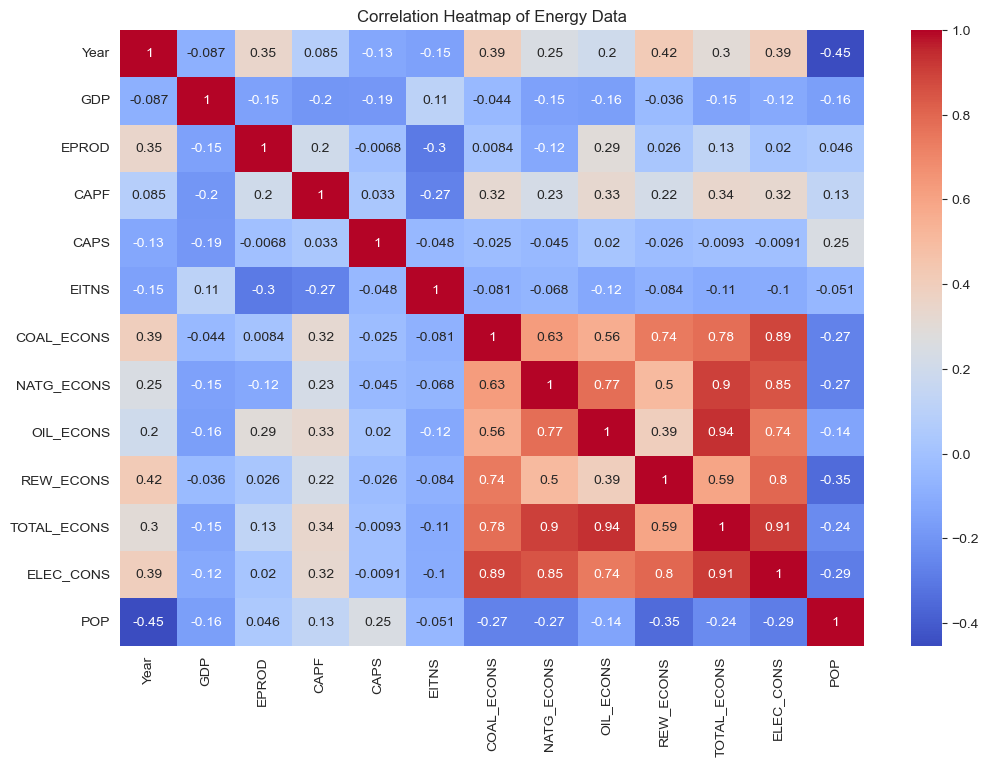

R-squared Score: -1854.708661584961


In [16]:
# Step 7: Correlation Analysis
# Calculate correlation matrix
correlation_matrix = data_df.corr()

# Step 8: Visualization
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Energy Data')
plt.show()


print(f"R-squared Score: {r2}")

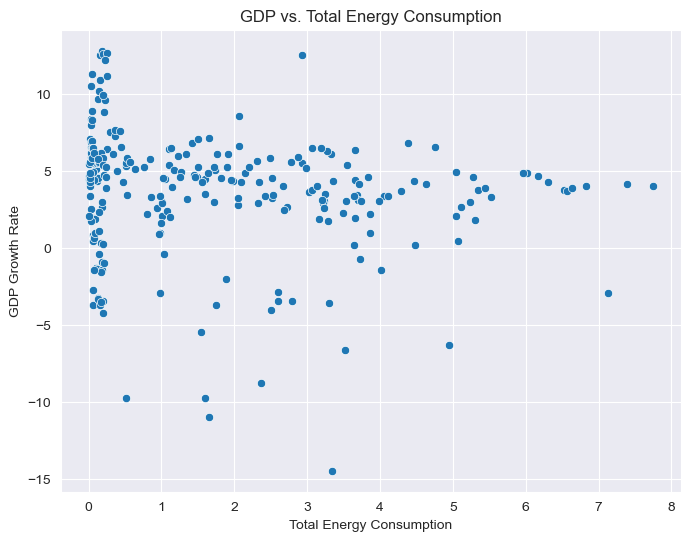

In [17]:
# Step 9: Visualize Relationships Between Key Variables
# Scatter plot for GDP vs. Total Energy Consumption
plt.figure(figsize=(8, 6))

# Use any categorical column for hue if available
if len(non_numeric_columns) > 0:
    hue_column = non_numeric_columns[0]  # Use the first non-numeric column
    sns.scatterplot(x='TOTAL_ECONS', y='GDP', data=data_df, hue=hue_column)
else:
    sns.scatterplot(x='TOTAL_ECONS', y='GDP', data=data_df)

plt.title('GDP vs. Total Energy Consumption')
plt.xlabel('Total Energy Consumption')
plt.ylabel('GDP Growth Rate')
plt.show()



In [18]:
# Step 10: Prepare Data for Machine Learning
# Select relevant features and target variable
# Remove the 'Year' column as it is not a predictor for this case
features = data_df.drop(['GDP', 'Year'], axis=1, errors='ignore')  # Use 'errors=ignore' to avoid errors if columns are missing
target = data_df['GDP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 11: Apply Machine Learning Model
# Use a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 12: Evaluate Model
# Predict on test set and evaluate
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 33559.76035632625
